In [2]:
import flv_utils as flv
import numpy as np
import matplotlib.pyplot as plt

Sourcing files from flv-c servers


In [3]:
def fill_spaces(text):
    """
    Replace all spaces in a string with underscores.
    
    Parameters:
    text : str
        Input string
        
    Returns:
    str
        String with spaces replaced by underscores
    """
    return text.replace(' ', '_')

In [34]:
def plot_many_traces(data, 
                     title="Overlaid Traces", 
                     figsize=(8, 4), 
                     offset=None, trace_indices=None, 
                     auto_offset_factor=1.5,
                     savedir='.',
                     color=None
                    ):
    traces = data['neuron_traces']
    
    # Handle trace selection
    if trace_indices is None:
        trace_indices = slice(0, min(6, traces.shape[0]))
    elif isinstance(trace_indices, (list, tuple, range)):
        trace_indices = [i for i in trace_indices if 0 <= i < traces.shape[0]]
    elif isinstance(trace_indices, slice):
        start, stop, step = trace_indices.indices(traces.shape[0])
        trace_indices = slice(start, min(stop, traces.shape[0]), step)
    
    # Get selected traces
    if isinstance(trace_indices, slice):
        selected_traces = traces[trace_indices]
        trace_numbers = list(range(*trace_indices.indices(traces.shape[0])))
    else:
        selected_traces = traces[trace_indices]
        trace_numbers = trace_indices
    
    # Calculate automatic offset if not provided
    if offset is None:
        # Use standard deviation of all selected traces as offset
        offset = np.std(selected_traces) * auto_offset_factor
    
    plt.figure(figsize=figsize)
    
    # Extended color palette - only use if no specific color is given
    if color is None:
        colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 
                  'pink', 'gray', 'cyan', 'magenta', 'lime', 'navy']
    
    for i, (trace, trace_num) in enumerate(zip(selected_traces, trace_numbers)):
        # Apply vertical offset
        trace_with_offset = trace + (i * offset)
        
        # Determine color to use
        if color is None:
            plot_color = colors[i % len(colors)]
        else:
            plot_color = color
        
        plt.plot(trace_with_offset, 
                label=f'{data['datasets'][trace_num]}', 
                color=plot_color, 
                linewidth=2, 
                alpha=0.8)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Time (minutes)', fontsize=14, fontweight='bold')
    plt.ylabel('')
    plt.xlim(0,1600)
    plt.xticks([0, 400, 800, 1200, 1600], [0, 4, 8, 12, 16], fontsize=12)
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    
    # Remove the box around the plot
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    plt.tight_layout()
    
    if savedir:
        plt.savefig(f"{savedir}/{fill_spaces(title)}.png")
        
    plt.show()

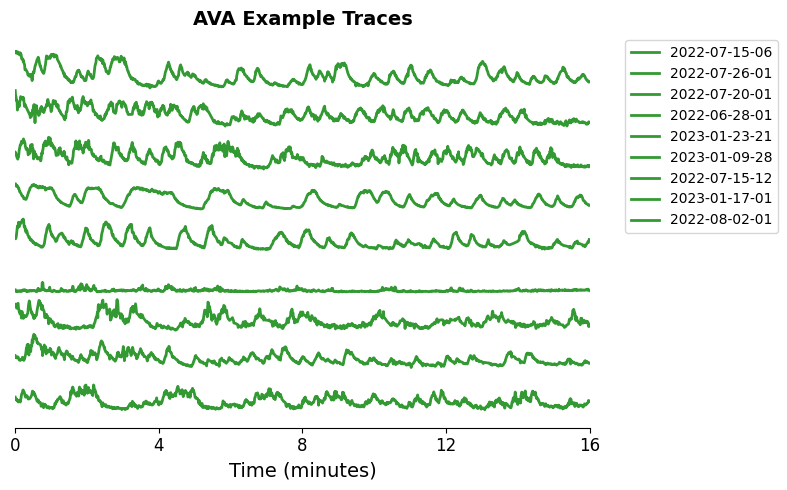

In [33]:
neuron_class = "AVA"

data = flv.by_class(neuron_class, 
                    include=['neuropal', 'baseline'], 
                    # include=['very_starved'],
                    # include=['just_fed'],
                    # include=['gfp'],
                    exclude=['gfp'], 
                    confidence_threshold=5)

title = f"Example Traces of {neuron_class} in {condition} condition"
# savedir = "/home/candy/candy_testing/eg_traces"
plot_many_traces(data, title, 
                 # savedir=None, 
                 offset=2.5, 
                 color='green',
                 trace_indices=[0,2,4,6,8,10,12,14,16], figsize=(8,5))

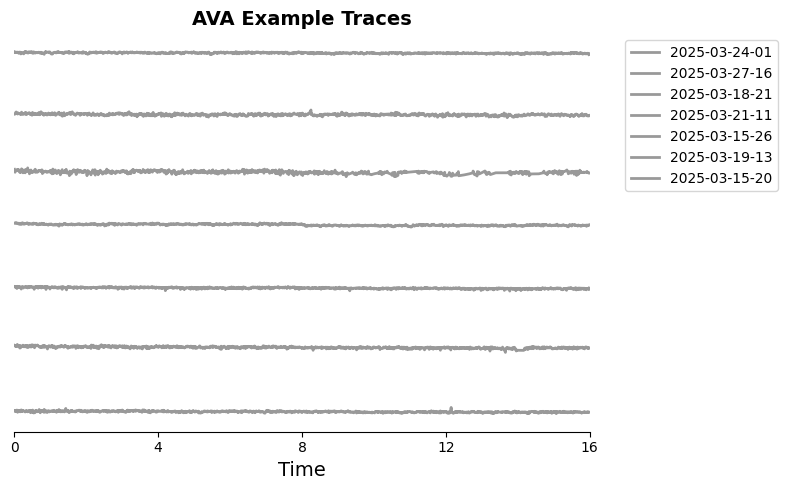

In [31]:
neuron_class = "AVA"

data = flv.by_class(neuron_class, 
                    # include=['neuropal', 'baseline'], 
                    # include=['very_starved'],
                    # include=['just_fed'],
                    include=['gfp'],
                    # exclude=['gfp'], 
                    confidence_threshold=4)

title = f"{neuron_class} Example Traces"
# savedir = "/home/candy/candy_testing/eg_traces"
plot_many_traces(data, title, 
                 # savedir=None, 
                 offset=2.5, 
                 color='grey',
                 trace_indices=[0,2,4,6,8,10,12,14,16], figsize=(8,5))